In [1]:
import random
import math
import pylab as pl
import numpy as np

In [2]:
def generateData (numberOfClassEl, numberOfClasses):
    data = []
    cls = []
    for classNum in range(numberOfClasses):
        centerX, centerY = random.random()*5.0, random.random()*5.0
        for rowNum in range(numberOfClassEl):
            data.append([random.gauss(centerX,0.5), random.gauss(centerY,0.5)])
            cls.append(classNum)
    return data,cls

In [3]:
data, cls = generateData(100, 3)

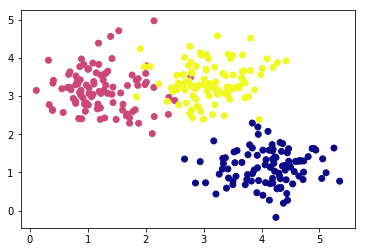

In [4]:
def showData (data, cls):
    pl.scatter([data[i][0] for i in range(len(data))],
               [data[i][1] for i in range(len(data))],
               c=cls, cmap='plasma')
    pl.show()   
showData (data, cls)

In [5]:
def splitTrainTest (data, cls, testPercent):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for row in range(len(data)):
        if random.random() < testPercent:
            X_test.append(data[row])
            y_test.append(cls[row])
        else:
            X_train.append(data[row])
            y_train.append(cls[row])
    return X_train, y_train, X_test, y_test
X_train, y_train, X_test, y_test = splitTrainTest(data, cls, 0.3)

In [6]:
class kNN:
    
    def __init__(self, X_train, y_train, k, cls_quan):
        self.X_train = X_train
        self.y_train = y_train
        self.cls_quan = cls_quan
        self.k = k
        
    def distance(self, a, b):
        dist = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
        return dist
    
    def prediction(self, X_test):
        self.X_test = X_test        
        y_pred = []
        
        for point in self.X_test:
            dist = [[self.distance(point, self.X_train[i]), self.y_train[i]] for i in range(len(self.X_train))]
            
            cls_points = [0 for i in range(self.cls_quan)]
            for rad in sorted(dist)[:self.k]:
                cls_points[rad[1]] += 1
                
            y_pred.append(cls_points.index(max(cls_points)))
        return y_pred

In [7]:
def showDataOnMesh (X_train, X_test, y_train):
    #Generate a mesh of nodes that covers all train cases
    
    def generateTestMesh (trainData):
        x_min = min( [trainData[i][0] for i in range(len(trainData))] ) - 1.0
        x_max = max( [trainData[i][0] for i in range(len(trainData))] ) + 1.0
        y_min = min( [trainData[i][1] for i in range(len(trainData))] ) - 1.0
        y_max = max( [trainData[i][1] for i in range(len(trainData))] ) + 1.0
        h = 0.05
        testX, testY = np.meshgrid(np.arange(x_min, x_max, h),
                                   np.arange(y_min, y_max, h))
        return [testX, testY]
    
    trainData      = X_test
    testMesh       = generateTestMesh (X_test)
    testMeshLabels = kNN(X_train, y_train, 3,4).prediction(zip(testMesh[0].ravel(), testMesh[1].ravel()))
    pl.pcolormesh(testMesh[0],
                  testMesh[1],
                 np.asarray(testMeshLabels).reshape(testMesh[0].shape), 
                 cmap = 'spring')
    pl.scatter([X_train[i][0] for i in range(len(X_train))],
               [X_train[i][1] for i in range(len(X_train))],
               c=y_train,
               cmap='inferno')
    pl.show()

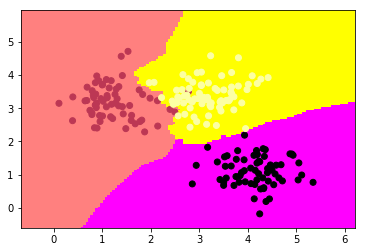

In [8]:
showDataOnMesh(X_train, X_test, y_train)